In [20]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('DisneylandReviews.csv')

In [3]:
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


### Entender el dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.3+ MB


In [5]:
# mostrar filas de 100 a 200
df.iloc[100:201, :]

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
100,662664830,3,2019-2,India,"It s a very huge game cum theme park, so if ...",Disneyland_HongKong
101,662641193,1,2019-3,India,The main attractions were shut while we still ...,Disneyland_HongKong
102,662600452,4,2019-3,Singapore,While it's not as great other Disney propertie...,Disneyland_HongKong
103,662592140,4,2019-4,United States,We made it to Honk Kong Disney on the MTR and ...,Disneyland_HongKong
104,662516931,5,2019-3,Australia,"Even though it is smaller, there is great ride...",Disneyland_HongKong
...,...,...,...,...,...,...
196,653828557,4,2018-12,Hong Kong,Such a lovely place that really took me back t...,Disneyland_HongKong
197,653746393,5,2018-3,United Arab Emirates,Fantastic experience. Enjoyed every step of ou...,Disneyland_HongKong
198,653600635,5,2018-5,Indonesia,No doubt people keep saying this is the happie...,Disneyland_HongKong
199,653600185,4,2018-6,Hong Kong,We never had went Tokyo Disneyland or Shanghai...,Disneyland_HongKong


In [11]:
## ¿Hay comentarios largos?

def calculate_words(fila):
    word = fila["Review_Text"]
    return len(word.split(" "))

df["words_count"] = df.apply(calculate_words, axis=1)

In [14]:
df.describe()

,Review_ID,Rating,words_count
count,4.265600e+04,42656.000000,42656.000000
mean,3.188553e+08,4.217695,132.174723
std,1.657092e+08,1.063371,160.717790
min,1.398724e+06,1.000000,4.000000
25%,1.743274e+08,4.000000,46.000000
50%,2.907583e+08,5.000000,82.000000
75%,4.489579e+08,5.000000,158.000000
max,6.708014e+08,5.000000,5600.000000


In [ ]:
df[df["words_count"] < 5]

## palabras que se repiten

In [18]:
texto_completo = ' '.join(review for review in df['Review_Text'])


Generando la nube de palabras...


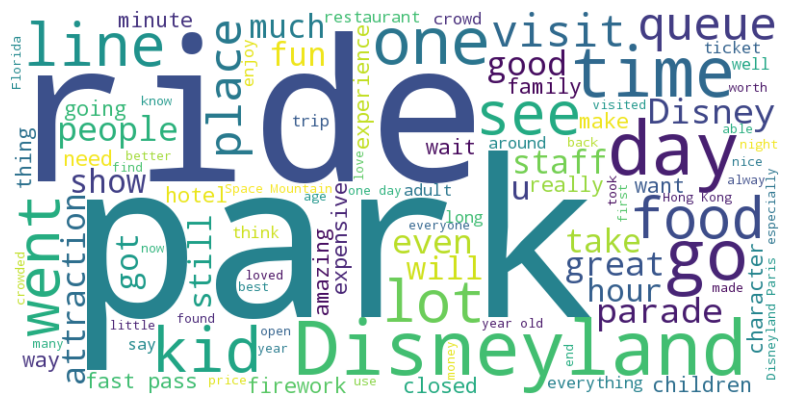

In [21]:
stopwords = set(STOPWORDS)
stopwords.update(["de", "la", "que", "el", "en", "y", "a", "los", "del", "las", "un", "por", "no", "una", "su", "para", "es", "al", "lo", "como", "más", "pero", "sus", "le", "ya", "o", "este", "ha", "sí", "porque", "esta", "cuando", "muy", "sin", "sobre", "también", "me", "hasta", "hay", "donde", "quien", "desde", "todo", "nos", "durante", "todos", "uno", "les", "ni", "contra", "otros", "ese", "eso", "ante", "ellos", "e", "esto", "mí", "antes", "algunos", "qué", "ninguno", "mi", "mis", "tú", "te", "ti", "tu", "tus", "ellas", "nosotros", "vosotros", "vosotras", "os", "mío", "mía", "míos", "mías", "tuyo", "tuya"])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      max_words=100,
                      width=800,
                      height=400).generate(texto_completo)

print("\nGenerando la nube de palabras...")
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()